In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import random
import numpy as np
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

seed = 2023
deterministic = True

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

cuda:0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

p = '/content/drive/MyDrive/ADD/road/ambient/ambient_dyno_drive_winter'
pp = '/content/drive/MyDrive/ADD/road/ambient/ambient_highway_street_driving_diagnostics'
ppp = '/content/drive/MyDrive/ADD/road/ambient/ambient_dyno_idle_radio_infotainment'


def makediff(df):
    res = df.copy()
    res['diff'] = df.groupby('id')['time'].diff()
    res['diff'].fillna(res.groupby('id')['diff'].transform('mean'), inplace=True)
    res['diff'] *= 80
    res['diff'] += 0.001
    res['diff'] = np.log2(res['diff'])
    return res


def makeCSV(path):
    p = path +'.log'
    df = pd.read_csv(p, delimiter = ' ', names=['time', 'port', 'id'])
    df['time'] = df['time'].str.slice(1, -1)
    df[['id', 'data']] = df['id'].str.split('#', expand=True)
    for i in range(8):
        x = 'd' + str(i)
        df[x] = df['data'].str[2*i:2*i+2]
    df['time'] = pd.to_numeric(df['time'])
    df = makediff(df)
    df = df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'diff']]
    df.to_csv(path + '.csv', index=False)
    return


# makeCSV(p)
# makeCSV(pp)
# makeCSV(ppp)

csvPath = p + '.csv'
df = pd.read_csv(csvPath)
df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']] = df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
df.loc[:, 'id':'d7'] /= 256
df = df[['id', 'diff']]
free1 = np.array(df).astype(np.float32)

csvPath = pp + '.csv'
df = pd.read_csv(csvPath)
df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']] = df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
df.loc[:, 'id':'d7'] /= 256
df = df[['id', 'diff']]
free2 = np.array(df).astype(np.float32)

csvPath = ppp + '.csv'
df = pd.read_csv(csvPath)
df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']] = df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
df.loc[:, 'id':'d7'] /= 256
df = df[['id', 'diff']]
free3 = np.array(df).astype(np.float32)

In [ ]:
import pandas as pd
import numpy as np


def makeCSV(path, pattern, pid, pattern2, num, start, end):
    p = path +'.log'
    df = pd.read_csv(p, delimiter = ' ', names=['time', 'port', 'id'])
    df['time'] = df['time'].str.slice(1, -1)
    df[['id', 'data']] = df['id'].str.split('#', expand=True)
    df['label'] = 0
    df['time'] = pd.to_numeric(df['time'])
    base = df['time'].iloc[0]
    df = makediff(df)
    for i in range(8):
        x = 'd' + str(i)
        df[x] = df['data'].str[2*i:2*i+2]
    if pid:
        if pattern:
            df.loc[(df['data'] == pattern) & (df['id'] == pid) & (start + base < df['time']) & (df['time'] < end + base), 'label'] = 1
        else:
            col = 'd' + str(num)
            df.loc[(df[col] == pattern2) & (df['id'] == pid) & (start + base < df['time']) & (df['time'] < end + base), 'label'] = 1
    else:
        df.loc[(df['data'] == pattern) & (start + base < df['time']) & (df['time'] < end + base), 'label'] = 1
    df = df[['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'diff', 'label']]
    df.to_csv(path + '.csv', index=False)

    return


q = '/content/drive/MyDrive/ADD/road/attacks/reverse_light_on_attack_1'
qq = '/content/drive/MyDrive/ADD/road/attacks/reverse_light_on_attack_1_masquerade'

# makeCSV(q, '595945450000FFFF', '6E0', '', 0, 9.191851, 30.050109)
# makeCSV(qq, '595945450000FFFF', '6E0', '', 0, 9.191851, 30.050109)

csvPath = q + '.csv'
cf = pd.read_csv(csvPath)
cf.loc[:, 'id':'d7'] = cf.loc[:, 'id':'d7'].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
cf.loc[:, 'id':'d7'] /= 256

cf = cf[['id', 'diff', 'label']]
cs1 = np.array(cf).astype(np.float32)

csvPath = qq + '.csv'
cf = pd.read_csv(csvPath)
cf.loc[:, 'id':'d7'] = cf.loc[:, 'id':'d7'].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
cf.loc[:, 'id':'d7'] /= 256
cf = cf[['id', 'diff', 'label']]
cs2 = np.array(cf).astype(np.float32)


q = '/content/drive/MyDrive/ADD/road/attacks/reverse_light_on_attack_2'
qq = '/content/drive/MyDrive/ADD/road/attacks/reverse_light_on_attack_2_masquerade'

# makeCSV(q, '595945450000FFFF', '6E0', '', 0, 6.830477, 28.225908)
# makeCSV(qq, '595945450000FFFF', '6E0', '', 0, 6.830477, 28.225908)

csvPath = q + '.csv'
cf = pd.read_csv(csvPath)
cf.loc[:, 'id':'d7'] = cf.loc[:, 'id':'d7'].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
cf.loc[:, 'id':'d7'] /= 256

cf = cf[['id', 'diff', 'label']]
cs3 = np.array(cf).astype(np.float32)

csvPath = qq + '.csv'
cf = pd.read_csv(csvPath)
cf.loc[:, 'id':'d7'] = cf.loc[:, 'id':'d7'].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
cf.loc[:, 'id':'d7'] /= 256

cf = cf[['id', 'diff', 'label']]
cs4 = np.array(cf).astype(np.float32)

q = '/content/drive/MyDrive/ADD/road/attacks/reverse_light_on_attack_3'
qq = '/content/drive/MyDrive/ADD/road/attacks/reverse_light_on_attack_3_masquerade'

# makeCSV(q, '595945450000FFFF', '6E0', '', 0, 4.318482, 16.95706)
# makeCSV(qq, '595945450000FFFF', '6E0', '', 0, 4.318482, 16.95706)

csvPath = q + '.csv'
cf = pd.read_csv(csvPath)
cf.loc[:, 'id':'d7'] = cf.loc[:, 'id':'d7'].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
cf.loc[:, 'id':'d7'] /= 256

cf = cf[['id', 'diff', 'label']]
cs5 = np.array(cf).astype(np.float32)

csvPath = qq + '.csv'
cf = pd.read_csv(csvPath)
cf.loc[:, 'id':'d7'] = cf.loc[:, 'id':'d7'].apply(lambda x: x.astype(str).map(lambda x: int(x, 16)))
cf.loc[:, 'id':'d7'] /= 256

cf = cf[['id', 'diff', 'label']]
cs6 = np.array(cf).astype(np.float32)

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split


N = 200
d = 50


def attackData(data):
    X, Y = list(), list()
    XX, YY = list(), list()
    for i in range(0, len(data), d):
        if i + N < len(data):
            temp = data[i:i+N]
            flag = 1
            for t in temp:
                if t[-1] == 1:
                    a = np.array(temp[:, :-1]).astype(np.float32)
                    XX.append(torch.tensor(a, dtype=torch.float32))
                    YY.append('Attack')
                    flag = 0
                    break
            if flag:
                a = np.array(temp[:, :-1]).astype(np.float32)
                X.append(torch.tensor(a, dtype=torch.float32))
                Y.append('Normal')
    return X, Y, XX, YY


def benignData(data):
    X, Y = list(), list()
    for i in range(0, len(data), d):
        if i + N < len(data):
            temp = data[i:i+N]
            X.append(torch.tensor(temp, dtype=torch.float32))
            Y.append('Normal')
    return X, Y


class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]


trainX1, trainY1 = benignData(free1)
trainX2, trainY2 = benignData(free2)
trainX3, trainY3 = benignData(free3)

d1 = CustomDataset(trainX1, trainY1)
d2 = CustomDataset(trainX2, trainY2)
d3 = CustomDataset(trainX3, trainY3)

In [ ]:
norX1, norY1, attX1, attY1 = attackData(cs1)

normaldataset1 = CustomDataset(norX1, norY1)
attackdataset1 = CustomDataset(attX1, attY1)

norX2, norY2, attX2, attY2 = attackData(cs2)

normaldataset2 = CustomDataset(norX2, norY2)
attackdataset2 = CustomDataset(attX2, attY2)

norX3, norY3, attX3, attY3 = attackData(cs3)

normaldataset3 = CustomDataset(norX3, norY3)
attackdataset3 = CustomDataset(attX3, attY3)

norX4, norY4, attX4, attY4 = attackData(cs4)

normaldataset4 = CustomDataset(norX4, norY4)
attackdataset4 = CustomDataset(attX4, attY4)

norX5, norY5, attX5, attY5 = attackData(cs5)

normaldataset5 = CustomDataset(norX5, norY5)
attackdataset5 = CustomDataset(attX5, attY5)

norX6, norY6, attX6, attY6 = attackData(cs6)

normaldataset6 = CustomDataset(norX6, norY6)
attackdataset6 = CustomDataset(attX6, attY6)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, Conv1d, LSTM


class customModel(nn.Module):
    def __init__(self, in_channels, channels):
        super(customModel, self).__init__()
        self.conv1d = Conv1d(in_channels, channels, kernel_size=3, padding=1)
        self.rnn = LSTM(channels, channels, num_layers=2, bidirectional=True, batch_first=True)
        self.fc = Linear(channels*2, 2)

    def forward(self, x):
        x = x.transpose(1, 2)
        x = self.conv1d(x)
        x = x.transpose(1, 2)
        x = x.relu()
        x, state = self.rnn(x)
        x = x.relu()
        x = self.fc(x)
        return x

In [ ]:
def Training(model, loader):
    epochs = 20
    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for epoch in range(epochs):
        for i, d in enumerate(loader):
            optimizer.zero_grad()
            x = d[0].to(device)
            x = x[:, :, 1:]
            out = model(x)
            loss = criterion(out, x)
            loss.backward()
            optimizer.step()
            if i%100 == 0:
                print(f'epoch: {epoch} [{100*i/len(loader):.4f}%] loss: {loss.item():.6f}')
        # model.eval()
        # testLoss = 0
        # with torch.no_grad():
        #     for j, dd in enumerate(ts):
        #         x, edge_index, batch = dd.x.to(device), dd.edge_index.to(device), dd.batch.to(device)
        #         out = model(x, edge_index, batch)
        #         testLoss += criterion(out, x.reshape(-1, N, 9)).item()
        # testLoss /= len(ts)
        # print(f'Test Loss: {testLoss}')


trainLoader = DataLoader(d1, batch_size=32, shuffle=True)
model = customModel(2, 128)
model.to(device)
Training(model, trainLoader)

In [ ]:
import matplotlib.pyplot as plt


def test(model, ts):
    res = list()
    criterion = torch.nn.L1Loss()
    model.eval()
    with torch.no_grad():
        for i, d in enumerate(ts):
            x = d[0].to(device)
            x = x[:, :, 1:]
            out = model(x)
            res.append(criterion(out, x).item())
    return res

# ft = DataLoader(tex, batch_size=1, shuffle=False)
# ft2 = DataLoader(tr, batch_size=1, shuffle=False)

# nt1 = DataLoader(normaldataset1, batch_size=1, shuffle=False)
nt2 = DataLoader(normaldataset2, batch_size=1, shuffle=False)
# nt3 = DataLoader(normaldataset3, batch_size=1, shuffle=False)
nt4 = DataLoader(normaldataset4, batch_size=1, shuffle=False)
# nt5 = DataLoader(normaldataset5, batch_size=1, shuffle=False)
nt6 = DataLoader(normaldataset6, batch_size=1, shuffle=False)

# at1 = DataLoader(attackdataset1, batch_size=1, shuffle=False)
at2 = DataLoader(attackdataset2, batch_size=1, shuffle=False)
# at3 = DataLoader(attackdataset3, batch_size=1, shuffle=False)
at4 = DataLoader(attackdataset4, batch_size=1, shuffle=False)
# at5 = DataLoader(attackdataset5, batch_size=1, shuffle=False)
at6 = DataLoader(attackdataset6, batch_size=1, shuffle=False)

# f = test(model, ft)
# f2 = test(model, ft2)

# n1 = test(model, nt1)
n2 = test(model, nt2)
# n3 = test(model, nt3)
n4 = test(model, nt4)
# n5 = test(model, nt5)
n6 = test(model, nt6)

# a1 = test(model, at1)
a2 = test(model, at2)
# a3 = test(model, at3)
a4 = test(model, at4)
# a5 = test(model, at5)
a6 = test(model, at6)

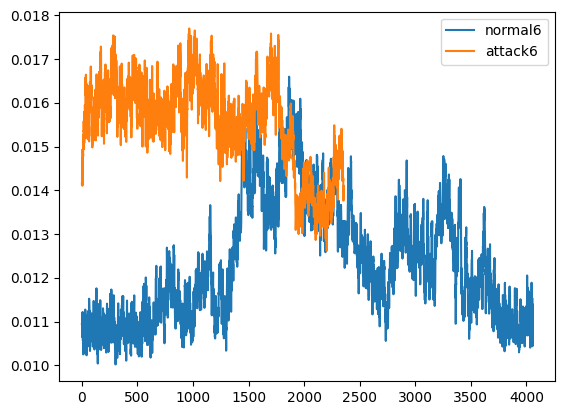

In [ ]:
# plt.plot(f, label='free')
# plt.plot(f2, label='free2')


# plt.plot(n1, label='normal1')
# plt.plot(n2, label='normal2')
# # plt.plot(n3, label='normal3')
# plt.plot(n4, label='normal4')
# # plt.plot(n5, label='normal5')
plt.plot(n6, label='normal6')

# # plt.plot(a1, label='attack1')
# plt.plot(a2, label='attack2')
# # plt.plot(a3, label='attack3')
# plt.plot(a4, label='attack4')
# plt.plot(a5, label='attack5')
plt.plot(a6, label='attack6')


plt.plot()
plt.legend()
plt.show()